In [1]:
import os
os.environ["JAX_PLATFORM_NAME"] = "cpu"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import bubblewrap as bw
import bubblewrap.input_sources.functional as fin
import tqdm as tqdm
from bubblewrap.input_sources.data_sources import NumpyTimedDataSource
import bubblewrap.plotting_functions as bpf

## Define Datasets

## Buzaki

In [3]:
obs, raw_behavior, bin_centers, beh_t = fin.construct_buzaki_data(base=fin.datasets["buzaki"][0], bin_size=0.03)

retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/buzaki_data_252347413985730.pickle


In [4]:
resampled_behavior = fin.resample_behavior(raw_behavior, bin_centers, beh_t)
hd = np.arctan2(resampled_behavior[:,0] - resampled_behavior[:,2], resampled_behavior[:,1] - resampled_behavior[:,3])
beh = resampled_behavior[:,:2]

n n+b

n b

In [5]:
pre_datasets = {
    # 's(obs,3) # i': fin.prosvd_data(input_arr=obs, output_d=3, init_size=30),
    
    # 's([obs,beh],1) # i': fin.prosvd_data(input_azscore=np.hstack([obs, beh]), output_d=1, init_size=50),
    # 's([obs,beh],2) # i': fin.prosvd_data(input_arr=np.hstack([obs, beh]), output_d=2, init_size=50),
    # 's([obs,beh],3) # i': fin.prosvd_data(input_arr=np.hstack([obs, beh]), output_d=3, init_size=50),
    # 's([obs,beh],4) # i': fin.prosvd_data(input_arr=np.hstack([obs, beh]), output_d=4, init_size=50),
    # 's([obs,beh],6) # i': fin.prosvd_data(input_arr=np.hstack([obs, beh]), output_d=6, init_size=50),
    # 's([obs,beh],12) # i': fin.prosvd_data(input_arr=np.hstack([obs, beh]), output_d=12, init_size=50),

    # 's([obs,beh],1) # i': fin.prosvd_data(input_arr=fin.zscore(np.hstack([obs, beh]), 10), output_d=1, init_size=50),
    's(z([obs,beh]),2) # i': fin.prosvd_data(input_arr=fin.zscore(np.hstack([obs, beh]), 10), output_d=2, init_size=50),
    # 's([obs,beh],3) # i': fin.prosvd_data(input_arr=fin.zscore(np.hstack([obs, beh]), 10), output_d=3, init_size=50),
    's(z([obs,beh]),4) # i': fin.prosvd_data(input_arr=fin.zscore(np.hstack([obs, beh]), 10), output_d=4, init_size=50),
    's(z([obs,beh]),6) # i': fin.prosvd_data(input_arr=fin.zscore(np.hstack([obs, beh]), 10), output_d=6, init_size=50),
    's(z([obs,beh]),12) # i': fin.prosvd_data(input_arr=fin.zscore(np.hstack([obs, beh]), 10), output_d=12, init_size=50),

    
    
    
    'pos # i o 🌀' : beh,
    'hd # o': hd.reshape(-1,1),
    # 'obs # o' : obs
    'obs.mean() # o' : obs.mean(axis=1).reshape(-1,1)
}

for key, value in pre_datasets.items():
    pre_datasets[key] = fin.clip(value, beh_t)

100%|███████████████████████████████| 745814/745814 [00:03<00:00, 187215.76it/s]


retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/prosvd_data_458087658619081.pickle


100%|███████████████████████████████| 745814/745814 [00:03<00:00, 198754.29it/s]


retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/prosvd_data_665626914766636.pickle


100%|███████████████████████████████| 745814/745814 [00:03<00:00, 193121.82it/s]


retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/prosvd_data_283300914246940.pickle


100%|███████████████████████████████| 745814/745814 [00:03<00:00, 188736.37it/s]


retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/prosvd_data_567203574858454.pickle


## Indy

In [3]:
obs, raw_behavior, bin_centers, beh_t = fin.construct_indy_data(fin.datasets["indy"][0])

In [4]:
resampled_behavior = fin.resample_behavior(raw_behavior, bin_centers, beh_t)
beh = resampled_behavior

In [12]:
pre_datasets = {
    's(obs,6) # i': fin.prosvd_data(input_arr=obs, output_d=6, init_size=30),
    # 's(z(obs),3) # i': fin.prosvd_data(input_arr=fin.zscore(obs, 10), output_d=3, init_size=30),
    's(obs,3) # o': fin.prosvd_data(input_arr=obs, output_d=3, init_size=30),
    'beh # o': beh,
    'z(beh) # o': fin.zscore(beh, 10),
    # 's(z(beh),1) # o': fin.prosvd_data(input_arr=fin.zscore(beh, 10), output_d=1, init_size=20),
    's(z([obs,beh]),6) # i 🌀': fin.prosvd_data(input_arr=fin.zscore(np.hstack([obs, beh])), output_d=6, init_size=20),
    # 's(z([obs,beh]),1) # o': fin.prosvd_data(input_arr=fin.zscore(np.hstack([obs, beh])), output_d=1, init_size=20),
}

for key, value in pre_datasets.items():
    pre_datasets[key] = fin.clip(value, beh_t)

retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/prosvd_data_070152927145278.pickle
retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/prosvd_data_107552194894550.pickle


100%|██████████████████████████████████| 27266/27266 [00:00<00:00, 81386.52it/s]


retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/prosvd_data_132267962612383.pickle


## Fly

In [131]:
obs, raw_behavior, obs_t, beh_t = fin.construct_fly_data(fin.datasets["fly"][0])

/home/jgould/miniconda3/envs/bw2/lib/python3.10/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/jgould/miniconda3/envs/bw2/lib/python3.10/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.3.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/jgould/miniconda3/envs/bw2/lib/python3.10/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [132]:
resampled_behavior = fin.resample_behavior(raw_behavior, obs_t, beh_t)
beh = resampled_behavior

In [133]:
pre_datasets = {
    's(obs,3) # i': fin.prosvd_data(input_arr=obs, output_d=3, init_size=30),
    's(z(obs),3) # i': fin.prosvd_data(input_arr=fin.zscore(obs, 10), output_d=3, init_size=30),
    's(obs,1) # o': fin.prosvd_data(input_arr=obs, output_d=1, init_size=30),
    # 'z(beh) # i': fin.zscore(beh, 10),
    's(z(beh),1) # o': fin.prosvd_data(input_arr=fin.zscore(beh, 10), output_d=1, init_size=20),
    's(z([obs,beh]),5) # i': fin.prosvd_data(input_arr=fin.zscore(np.hstack([obs, beh])), output_d=5, init_size=20),
    's(z([obs,beh]),1) # o': fin.prosvd_data(input_arr=fin.zscore(np.hstack([obs, beh])), output_d=1, init_size=20),
}

for key, value in pre_datasets.items():
    pre_datasets[key] = fin.clip(value, beh_t)

retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/prosvd_data_228423078208799.pickle


100%|██████████████████████████████████| 11671/11671 [00:00<00:00, 91360.40it/s]


retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/prosvd_data_895882024899689.pickle
retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/prosvd_data_561188369021184.pickle


100%|█████████████████████████████████| 11671/11671 [00:00<00:00, 211424.38it/s]


retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/prosvd_data_127001258086543.pickle


100%|██████████████████████████████████| 11671/11671 [00:00<00:00, 88282.90it/s]


retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/prosvd_data_435075322239975.pickle


100%|██████████████████████████████████| 11671/11671 [00:00<00:00, 91058.06it/s]


retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/prosvd_data_759406298300449.pickle


## Musal

In [3]:
ca, vid, t_ca, t_vid = fin.generate_musal_dataset(cam=1, video_target_dim=6, resize_factor=1, prosvd_init_size=100)

retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/generate_musal_dataset_254516486564245.pickle


In [18]:
pre_datasets = {
    's(vid,5) # i': fin.clip( fin.zscore(fin.prosvd_data(input_arr=vid, output_d=5, init_size=20), 10), t_vid),
    's(ca,5) # i': fin.clip(fin.prosvd_data(input_arr=ca, output_d=5, init_size=20), t_ca),
    's(ca,1) # o i': fin.clip(fin.prosvd_data(input_arr=ca, output_d=1, init_size=20), t_ca),
    's(vid,1) # o': fin.clip(fin.prosvd_data(input_arr=vid, output_d=1, init_size=20), t_vid)
}

# todo: ikey s(vid,1)

retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/prosvd_data_388081370473261.pickle


100%|█████████████████████████████████| 89711/89711 [00:00<00:00, 162556.28it/s]

retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/prosvd_data_997060259375761.pickle
retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/prosvd_data_687333164928070.pickle
retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/prosvd_data_987597838309270.pickle


## For all

In [6]:
with_randoms = {}
for key, value in pre_datasets.items():
    k = key.replace("🌀", "")
    with_randoms[k] = value
    if "🌀" in key:
        k, tags = k.split("#")
        k = k.strip()
        with_randoms[f"shuf({k}) #{tags.strip()}"] = (*fin.shuffle_time(value[0]), value[1])

datasets = {}
input_keys = []
output_keys = []
for key, value in with_randoms.items():
    k, tags = key.split("#")
    k = k.strip()
    datasets[k] = value
    assert np.all(np.isfinite(value[0]))
    if "i" in tags:
        input_keys.append(k)
    if "o" in tags:
        output_keys.append(k)

# Run Stuff

## Histograms

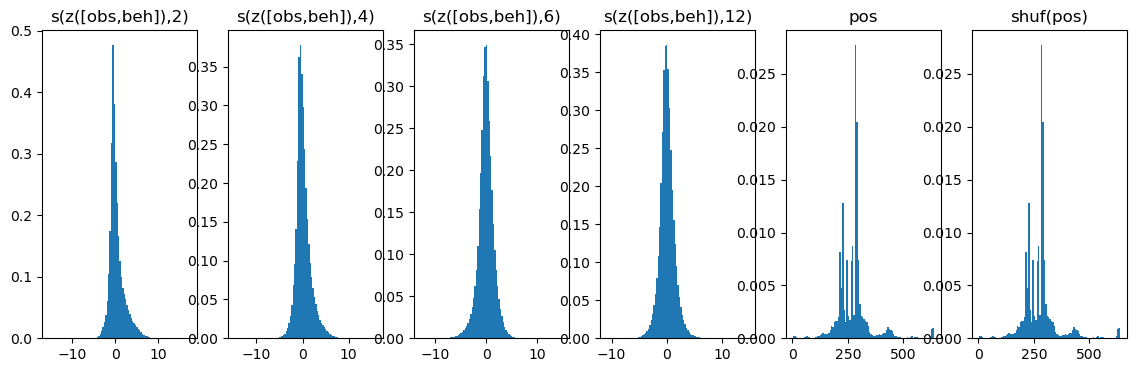

In [7]:
fig, ax = plt.subplots(ncols=len(input_keys), nrows=1, figsize=(14,4), squeeze=False)

for i, key in enumerate(input_keys):
    ax[0][i].hist(datasets[key][0].flatten(), bins=100, density=True)
    ax[0][i].set_title(key)

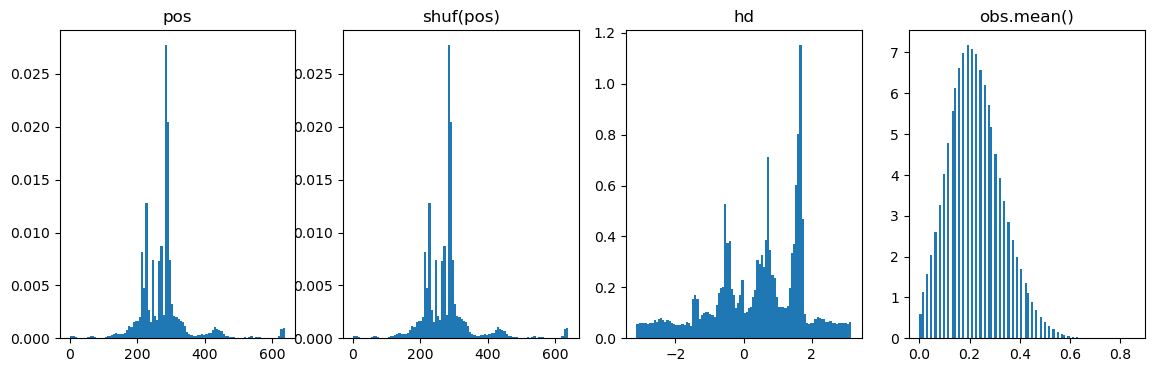

In [8]:
fig, ax = plt.subplots(ncols=len(output_keys), figsize=(14,4), squeeze=False)
for i, key in enumerate(output_keys):
    ax[0][i].hist(datasets[key][0].flatten(), bins=100, density=True)
    ax[0][i].set_title(key)

## Run Table

In [9]:
def evaluate(i,o, maxlen=30_000, bw_params=bw.default_parameters.default_jpca_dataset_parameters, seed=0):
    i, i_t, o, o_t = fin.clip(*i, *o, maxlen=maxlen)
    
    o_dt = np.median(np.diff(o_t))
    i_dt = np.median(np.diff(i_t))
    n_steps = int(np.ceil(o_dt/i_dt))
        
    br = bw.bw_run.simple_bw_run(input_arr=i,t=i_t, time_offsets=[0,n_steps], bw_params=bw_params)
    
    
    alpha_dict = br.alpha_history
    a_current, a_ahead, o, o_t = fin.clip(alpha_dict[0], alpha_dict[n_steps], o, o_t)
    reg = bw.regressions.SymmetricNoisyRegressor(input_d=a_current.shape[1], output_d=o.shape[1])
    
    pred, true, times = br.add_regressor_post_hoc(reg, o, o_t, test_offset=n_steps)
    return br, pred, true, times


In [10]:
%%time
default = bw.default_parameters.default_jpca_dataset_parameters
bw_params = dict(default, num=60, eps=1e-7, step=8e-2)
bw_params = dict(    
    bw_params, 
    num=300, 
    eps=1e-8, 
    step=4,
    num_grad_q=5,
)

bw_params = dict(
    bw_params, 
    num=20, 
    eps=1e-8, 
    step=3.9,
    num_grad_q=2,
)

results = {}
brs = {}
true_values = {}
for okey in output_keys:
    results[okey] = {}
    brs[okey] = {}
    true_values[okey] = {}
    for ikey in input_keys:
        print(f"{okey= } {ikey= }")
        
        br, pred, true, times = evaluate(datasets[ikey], datasets[okey], maxlen=5_000, bw_params=bw_params)
        
        results[okey][ikey] = pred
        brs[okey][ikey] = br
        true_values[okey][ikey] = (true, times)

okey= 'pos' ikey= 's(z([obs,beh]),2)'
retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/simple_bw_run_941938490251758.pickle
okey= 'pos' ikey= 's(z([obs,beh]),4)'
retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/simple_bw_run_794020715841338.pickle
okey= 'pos' ikey= 's(z([obs,beh]),6)'
retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/simple_bw_run_401384715351870.pickle
okey= 'pos' ikey= 's(z([obs,beh]),12)'
retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/simple_bw_run_687752203260410.pickle
okey= 'pos' ikey= 'pos'
retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/simple_bw_run_548939206321515.pickle
okey= 'pos' ikey= 'shuf(pos)'


100%|████████████████████████████████████▉| 4998/4999 [00:02<00:00, 1774.11it/s]


caching value in: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/simple_bw_run_195299867695051.pickle
retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/simple_bw_run_195299867695051.pickle
okey= 'shuf(pos)' ikey= 's(z([obs,beh]),2)'
retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/simple_bw_run_941938490251758.pickle
okey= 'shuf(pos)' ikey= 's(z([obs,beh]),4)'
retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/simple_bw_run_794020715841338.pickle
okey= 'shuf(pos)' ikey= 's(z([obs,beh]),6)'
retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/simple_bw_run_401384715351870.pickle
okey= 'shuf(pos)' ikey= 's(z([obs,beh]),12)'
retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/simple_bw_run_687752203260410.pickle
okey= 'shuf(pos)' ikey= 'pos'
retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/si

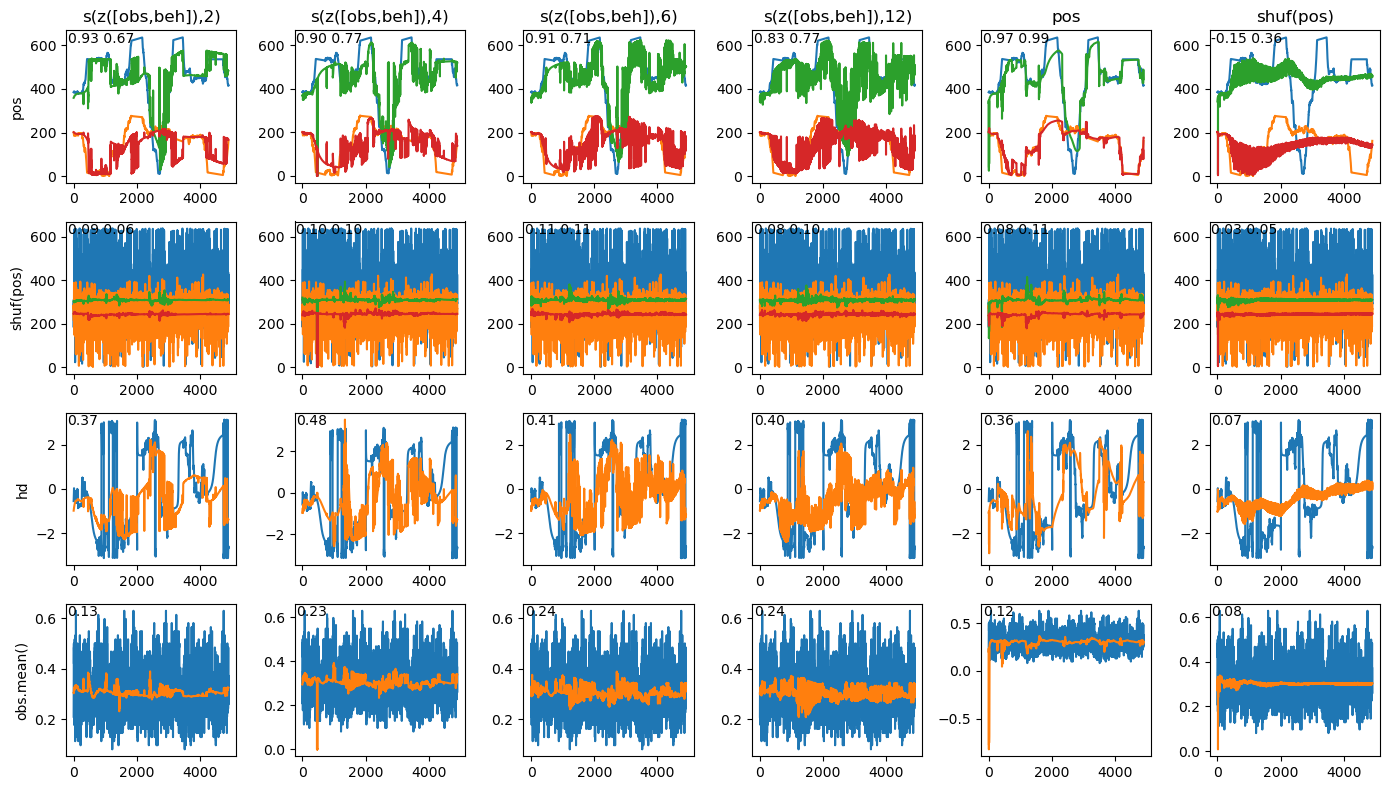

In [11]:
fig, ax = plt.subplots(nrows=len(output_keys), ncols=len(input_keys), figsize=(14,2*len(output_keys)), layout='tight', squeeze=False)

s = slice(-1)

for row, okey in enumerate(output_keys):
    ax[row,0].set_ylabel(okey)
    for col, ikey in enumerate(input_keys):
        true, times, predicted = fin.clip(*true_values[okey][ikey], results[okey][ikey])
        
        if 1:
            ax[row,col].plot(true[s])
            ax[row,col].plot(predicted[s])
        else:
            ax[row,col].plot(predicted[s]-true[s])
            ax[row,col].set_ylim((true.max() - true.min()) * np.array([-.5, .5]))
            # ax[row,col].plot()
        
        halfway = len(true)//2
        
        corrs = [np.corrcoef(true[halfway:,j], predicted[halfway:,j])[0,1] for j in range(true.shape[1])]
        if true.shape[1] < 4:
            corrs = " ".join([f"{c:.2f}" for c in corrs])
        else:
            corrs = f"{np.mean(corrs):.3f}"
        ax[row,col].text(.01,.99, corrs, ha='left', va='top', transform=ax[row, col].transAxes)
        if row == 0:
            ax[0,col].set_title(ikey)

In [95]:
A = np.corrcoef(o.T,p.T)[:o.shape[1], o.shape[1]:]
# A = A - np.diag(np.diag(A))
coords = np.unravel_index(np.argmax(A), A.shape)

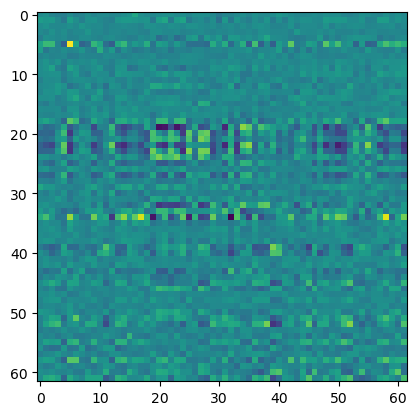

In [89]:
plt.imshow(A)

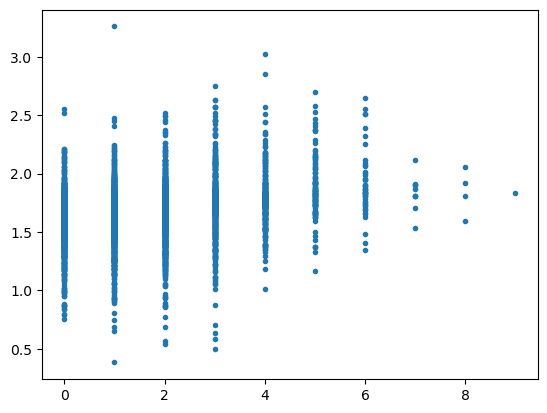

In [94]:
plt.plot(o[:,5], p[:,5], '.')

## Optimizing

In [25]:
datasets.keys()

dict_keys(['s(z([obs,beh]),2)', 's(z([obs,beh]),4)', 's(z([obs,beh]),6)', 's(z([obs,beh]),12)', 'pos', 'hd', 'obs.mean()'])

In [87]:
brs2 = []

In [88]:
brs2.append(evaluate(datasets['s(z([obs,beh]),4)'], datasets['pos'], maxlen=5_000, 
                     bw_params=
                     dict(
                         bw_params, 
                         num=20, 
                         eps=1e-8, 
                         step=3.9,
                         num_grad_q=2,
                     )
                    )[0])

retreiving cache from: /home/jgould/Documents/Bubblewrap/generated/datasets/cache/simple_bw_run_794020715841338.pickle


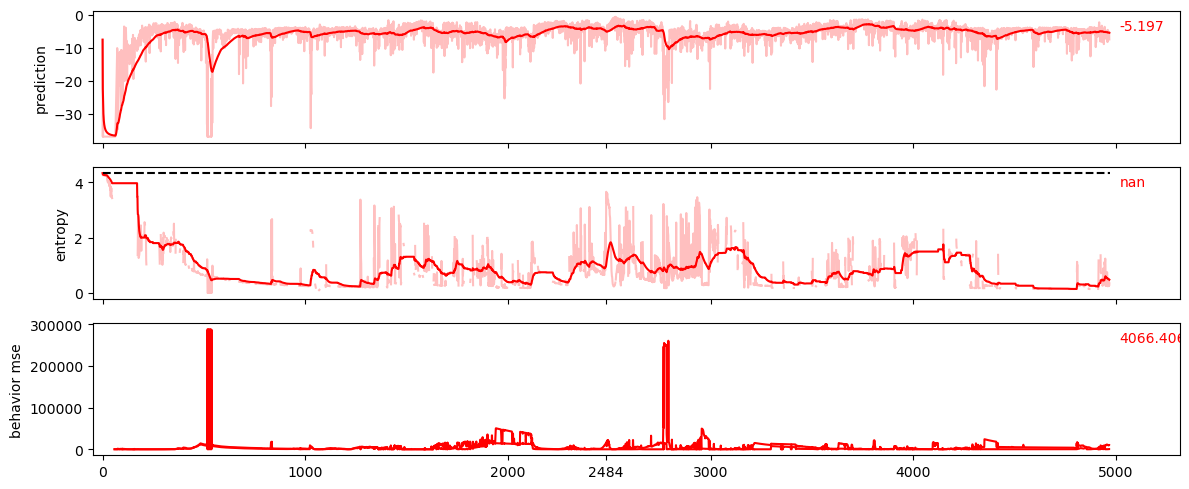

In [89]:
colors = ['k']*(len(brs2))
colors[-1] = 'r'
bpf.compare_metrics(brs2, colors=colors, offset=1, show_legend=False)

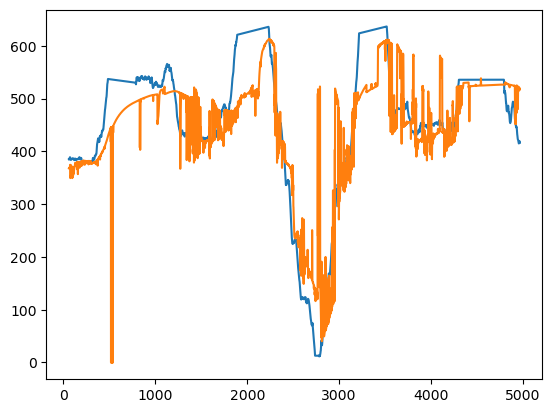

In [98]:
p = brs2[-1].behavior_pred_history[1]
e = brs2[-1].behavior_error_history[1]

t = p-e

plt.plot(t[:,0])
plt.plot(p[:,0])

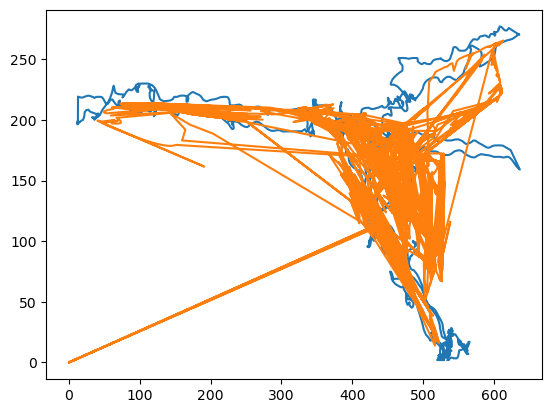

In [99]:
p = brs2[-1].behavior_pred_history[1]
e = brs2[-1].behavior_error_history[1]

t = p-e

plt.plot(t[:,0], t[:,1])
plt.plot(p[:,0], p[:,1])

# Compare Temporal Resolutions

In [ ]:
bin_widths = [.01, .03, .06]

fig, ax = plt.subplots(nrows=1, ncols=len(bin_widths), figsize=(14,4*1), layout='tight')

for idx, bin_width in enumerate(bin_widths):
    obs, raw_behavior, bin_centers, t = fin.construct_indy_data(fin.datasets["indy"][0])
    beh = fin.resample_behavior(raw_behavior, bin_centers, t)
    i = fin.prosvd_data(np.hstack([obs[10:], fin.zscore(beh, 10)]), 5, 20)
    o = fin.prosvd_data(beh, 1, 20)
    predicted, true = evaluate(i, o)
    predicted, true, t = fin.clip(predicted, true, t)
    
    mask = (800 < t) & (t < 860)
    ax[idx].plot(t[mask], true[mask])
    ax[idx].plot(t[mask], predicted[mask])
    ax[idx].set_title(f"{bin_width = }")

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=len(bin_widths), figsize=(14,4*1), layout='tight')

for idx, bin_width in enumerate(bin_widths):
    obs, raw_behavior, bin_centers, t = fin.construct_indy_data(fin.datasets["indy"][0])
    beh = fin.resample_behavior(raw_behavior, bin_centers, t)
    i = fin.prosvd_data(np.hstack([obs[10:], fin.zscore(beh, 10)]), 5, 20)
    o = fin.prosvd_data(beh, 1, 20)
    predicted, true = evaluate(i, o, auto_reg=True)
    predicted, true, t = fin.clip(predicted, true, t)
    
    mask = (800 < t) & (t < 860)
    ax[idx].plot(t[mask], true[mask])
    ax[idx].plot(t[mask], predicted[mask])
    ax[idx].set_title(f"{bin_width = }")

# Compare \alpha and \hat\alpha

In [ ]:
def do_regression(dataset, beh, method=1, nsteps=1, num=200):
    nsteps = 1
    alphas_shift = fin.bwrap_alphas_ahead(input_arr=dataset, bw_params=dict(bw.default_parameters.default_jpca_dataset_parameters, num=num), nsteps=nsteps)
    alphas_curr = fin.bwrap_alphas_ahead(input_arr=dataset, bw_params=dict(bw.default_parameters.default_jpca_dataset_parameters, num=num), nsteps=0)

    method = ['predicted current step', 'current step'][method]


    cut_beh = beh[-len(alphas_curr):]

    reg = bw.regressions.SymmetricNoisyRegressor(input_d=alphas_curr.shape[1], output_d=1)
    # reg = bw.regressions.NearestNeighborRegressor(input_d=alphas_curr.shape[1], output_d=1)
    preds = []
    cb = []
    for i in tqdm.tqdm(range(nsteps, len(alphas_curr)-2)):
        if method == 'predicted current step':
            reg.safe_observe(alphas_shift[i-nsteps], cut_beh[i])
        elif method == 'current step':
            reg.safe_observe(alphas_curr[i], cut_beh[i])


        preds.append(reg.predict(alphas_shift[i]))
        cb.append(cut_beh[i+nsteps])


    preds = np.squeeze(preds[np.nonzero(np.isfinite(preds))[0][0]:])[-1000:]
    cb = np.squeeze(cb)[-1000:]
    return preds, cb

In [ ]:
%matplotlib inline
fig, ax = plt.subplots()

p, t = do_regression(datasets['s3(z([s(neural), behavior]))'], datasets['z(behavior)'], method=1, num=60)

ax.plot(t)
ax.plot(p);
ax.set_xlabel('time')
ax.set_ylabel('synthetic behavior')
ax.set_title(f"Regression trained on $\\alpha$ ($R^2$ = {np.corrcoef(p,t)[0,1]:.2f})")
ax.legend(['true value (synthetic)', 'regressed value']);

In [ ]:
%matplotlib inline
fig, ax = plt.subplots()

p, t = do_regression(datasets['s3(z([s(neural), behavior]))'], datasets['z(behavior)'], method=0, num=60)

ax.plot(t)
ax.plot(p);
ax.set_xlabel('time')
ax.set_ylabel('synthetic behavior')
ax.set_title(f"Regression trained on $\\hat\\alpha$ ($R^2$ = {np.corrcoef(p,t)[0,1]:.2f})")
ax.legend(['true value (synthetic)', 'regressed value']);